<a href="https://colab.research.google.com/github/ItsBaiShiXi/MachineLearning_SongPopularity/blob/main/MachineLearning_SongPopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Data Collection

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [131]:
df = pd.read_csv("https://raw.githubusercontent.com/ItsBaiShiXi/MachineLearning_SongPopularity/main/top_10000_1960-now.csv")
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download joebeachcapital/top-10000-spotify-songs-1960-now
# !unzip -q /content/top-10000-spotify-songs-1960-now.zip -d /content/dataset_directory

#Data Exploration

In [3]:
df.shape

(9999, 35)

In [132]:
columns_to_drop = ['Track Name', 'Album Name', 'Track URI', 'Album URI', 'Artist URI(s)', 'Album Image URL', 'Album Artist URI(s)', 'Disc Number', 'Track Number', 'Track Duration (ms)', 'Track Preview URL', 'ISRC', 'Added By', 'Added At', 'Label', 'Copyrights', 'Album Genres', 'Artist Genres']
df = df.drop(columns_to_drop, axis=1)


In [133]:
missing_values = df.isnull()
missing_count = missing_values.sum()

print(missing_count)

Artist Name(s)          1
Album Artist Name(s)    2
Album Release Date      2
Explicit                0
Popularity              0
Danceability            2
Energy                  2
Key                     2
Loudness                2
Mode                    2
Speechiness             2
Acousticness            2
Instrumentalness        2
Liveness                2
Valence                 2
Tempo                   2
Time Signature          2
dtype: int64


In [ ]:
df.columns.tolist()

In [134]:
# Drop all the duplicated rows
df = df.drop_duplicates()
# Drop all the rows with missing data since there are only
# a small portion of data are missing
df = df.dropna();

In [ ]:
df.describe()

In [ ]:
df.info()

# Data Plotting

<Axes: >

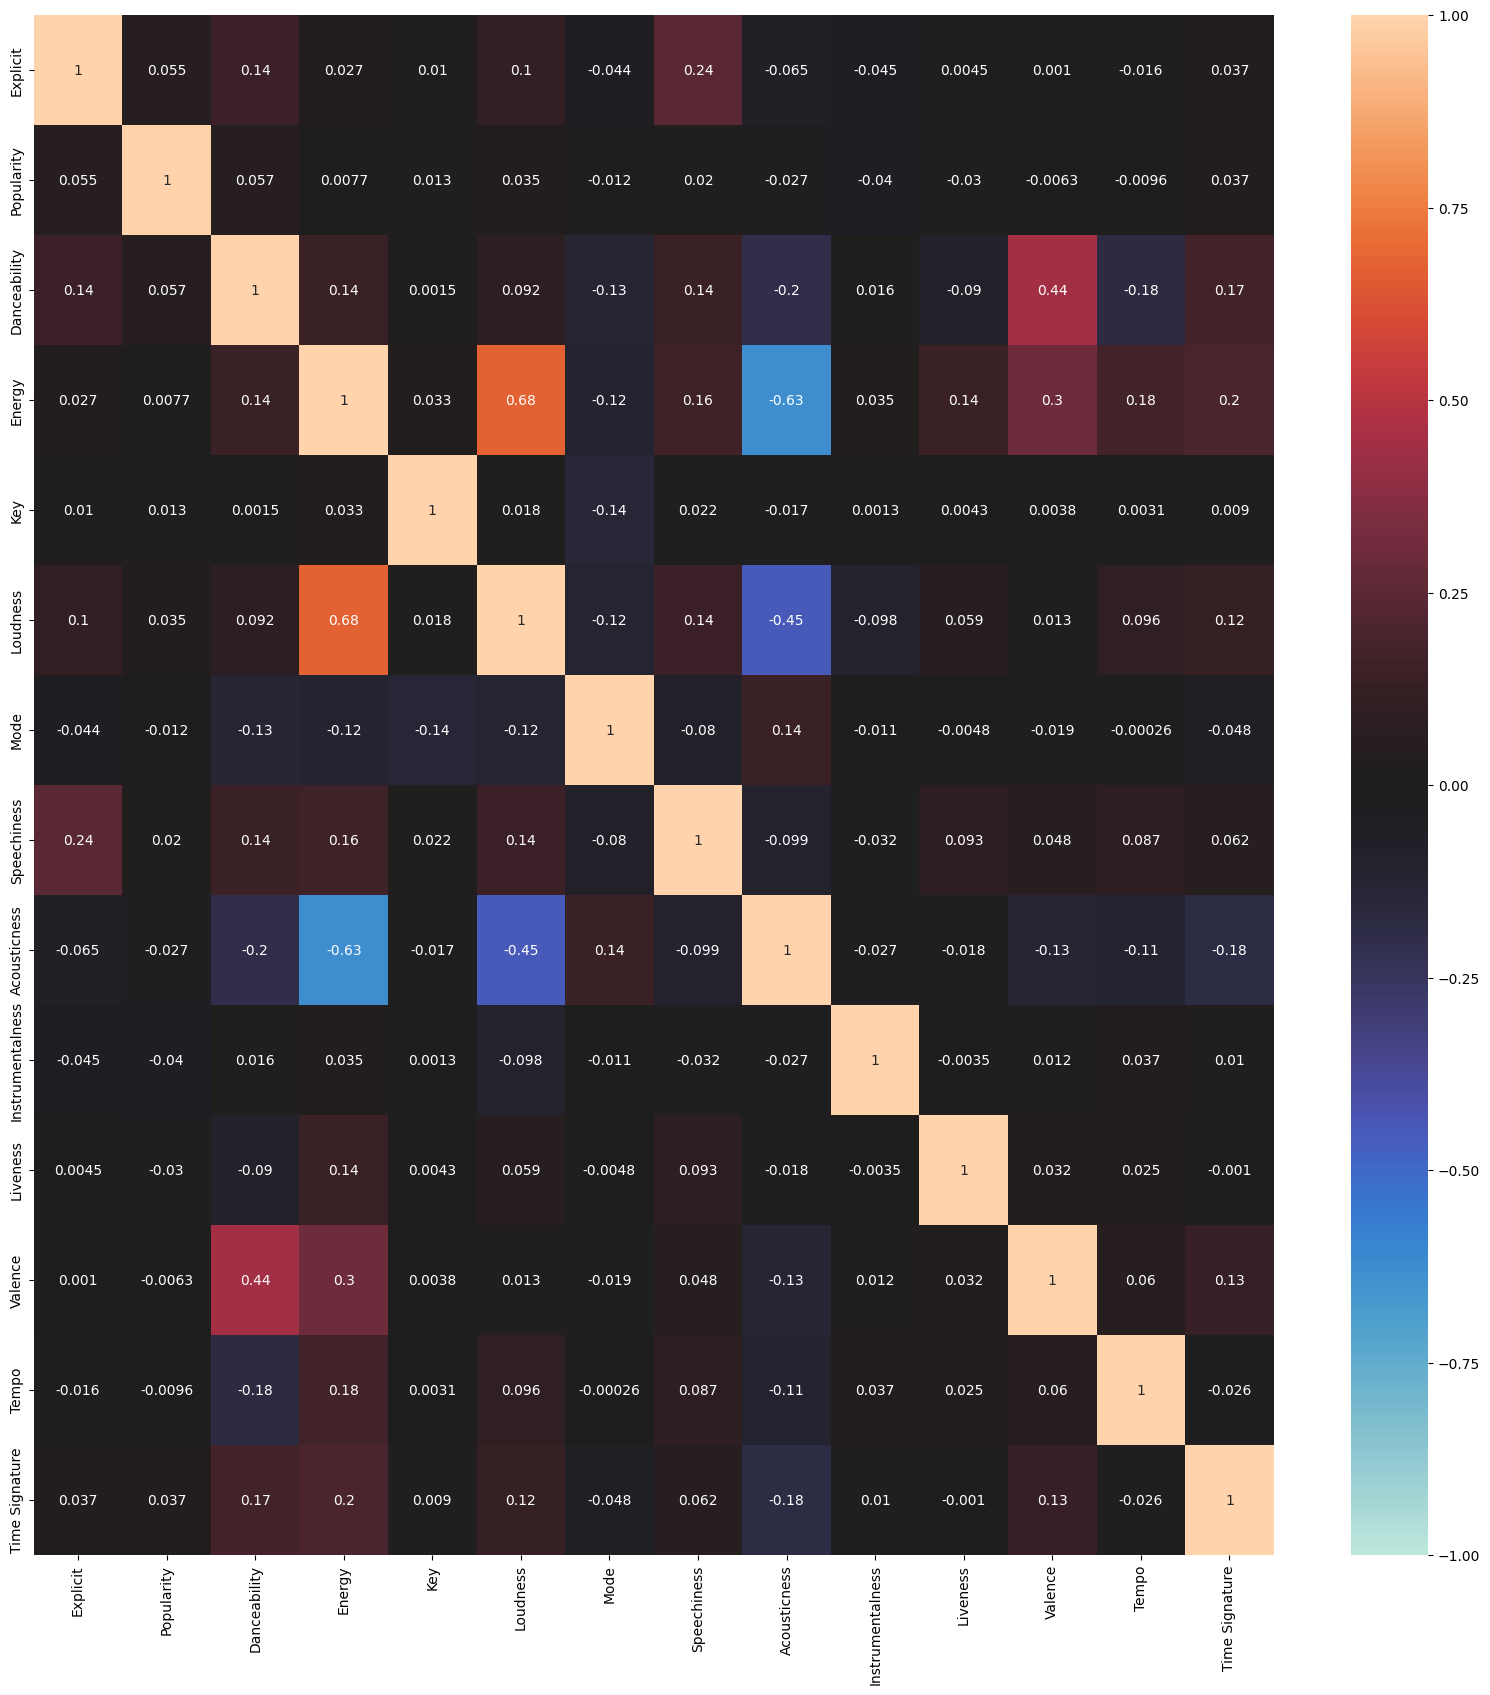

In [24]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2g", vmin=-1, vmax=1, center= 0)

In [ ]:
sns.histplot(df['Popularity'], kde=True)

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(df, diag_kind="kde")

# Data Encoding for RF model

In [ ]:
# Since I am applying random forest method to predict the song's popularity
# I think it is easier to split the 0-100 rate scale into 5 categories:
# 0-4 represent 0-20, 21-40, 41-60, 61-80, 81-100 score, and make my model
# predict on which category the song will fall in.
# This should make more sense than trying to predict the exact score.

In [135]:
rfdf = df

In [136]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
rfdf['Popularity'] = pd.cut(rfdf['Popularity'], bins=bins, labels=labels, right=False)

label_encoder = LabelEncoder()
rfdf['Popularity'] = label_encoder.fit_transform(rfdf['Popularity'])
rfdf['Popularity']

0       0
1       3
2       2
3       2
4       0
       ..
9994    3
9995    0
9996    3
9997    4
9998    3
Name: Popularity, Length: 9942, dtype: int64

In [82]:
# I am using label encoding for Artist Name(s) and Album Artist Names(s)
# If I use one-hot encoding, that would make me have more than 7000 columns
# in the end
# I further removed Track name and Album Name due to too many unique values
# removed Album Artist URI(s) since this is similar to Album Artist Names(s)


In [137]:
# Encode Artist Name(s)
label_encoder = LabelEncoder()
rfdf['Encoded Artist Name(s)'] = label_encoder.fit_transform(rfdf['Artist Name(s)'])
# Matching Table
matching_table = rfdf[['Artist Name(s)', 'Encoded Artist Name(s)']]
print(matching_table)
# Remove original 'Encoded Artist Name(s)' from rfdf
rfdf = rfdf.drop(['Artist Name(s)'], axis = 1)

                    Artist Name(s)  Encoded Artist Name(s)
0                          The KLF                    3612
1                          Pitbull                    2824
2                   Britney Spears                     511
3                        The Kinks                    3620
4               The Rolling Stones                    3709
...                            ...                     ...
9994                    Topic, A7S                    3878
9995                     Vandalism                    3950
9996  Spiller, Sophie Ellis-Bextor                    3303
9997                        Tiësto                    3837
9998                 Kylie Minogue                    2038

[9942 rows x 2 columns]


In [138]:
# Encode Album Artist Name(s)
label_encoder = LabelEncoder()
rfdf['Encoded Album Artist Name(s)'] = label_encoder.fit_transform(rfdf['Album Artist Name(s)'])
# Matching Table
matching_table = rfdf[['Album Artist Name(s)', 'Encoded Album Artist Name(s)']]
print(matching_table)
# Remove original 'Encoded Artist Name(s)' from rfdf
rfdf = rfdf.drop(['Album Artist Name(s)'], axis = 1)

     Album Artist Name(s)  Encoded Album Artist Name(s)
0                 The KLF                          2858
1                 Pitbull                          2210
2          Britney Spears                           424
3               The Kinks                          2866
4      The Rolling Stones                          2946
...                   ...                           ...
9994           Topic, A7S                          3093
9995            Vandalism                          3150
9996              Spiller                          2592
9997               Tiësto                          3058
9998        Kylie Minogue                          1589

[9942 rows x 2 columns]


In [139]:
# I will seperate Album Release Date into year, month, and day
# I am assuming each date value has their own impact to the popularity

# Convert the 'Album Release Date' to a pandas datetime object
rfdf['Album Release Date'] = pd.to_datetime(rfdf['Album Release Date'])

rfdf['ReleaseYear'] = rfdf['Album Release Date'].dt.year
rfdf['ReleaseMonth'] = rfdf['Album Release Date'].dt.month
rfdf['ReleaseDay'] = rfdf['Album Release Date'].dt.day

# Drop original 'Album Release Date' object
rfdf = rfdf.drop(['Album Release Date'], axis = 1)

In [123]:
rfdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9942 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Explicit                      9942 non-null   bool   
 1   Popularity                    9942 non-null   int64  
 2   Danceability                  9942 non-null   float64
 3   Energy                        9942 non-null   float64
 4   Key                           9942 non-null   float64
 5   Loudness                      9942 non-null   float64
 6   Mode                          9942 non-null   float64
 7   Speechiness                   9942 non-null   float64
 8   Acousticness                  9942 non-null   float64
 9   Instrumentalness              9942 non-null   float64
 10  Liveness                      9942 non-null   float64
 11  Valence                       9942 non-null   float64
 12  Tempo                         9942 non-null   float64
 13  Tim

# Divide Data into Train and Test for RF model

In [140]:
y = rfdf['Popularity']
X = rfdf.drop(['Popularity'], axis = 1)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Build Basic RF Model

In [151]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [159]:
print(f'Train Accuracy: {rf_model.score(X_train, y_train):.3f}')
print(f'Test Accuracy: {rf_model.score(X_test, y_test):.3f}')

Train Accuracy: 0.994
Test Accuracy: 0.368


Text(50.722222222222214, 0.5, 'Ground Truth')

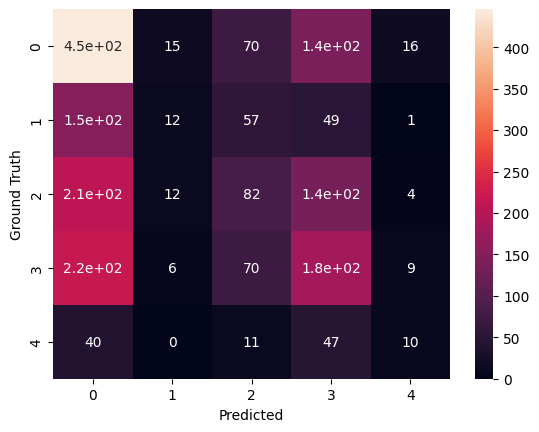

In [158]:
y_predicted = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')